## Zomato Data Review Analysis With Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import spacy
from spacy import displacy
from spacy import matcher

In [5]:
import nltk
from nltk import word_tokenize
from nltk.stem import *
import string

#### Importing the dataset

In [6]:
df = pd.read_csv("files/zom_rev.csv",index_col=0)
df

review  rating
0       One stop place for every foodie as you get var...     5.0
1       Punjab Sweets Corner is a place where you'll f...     5.0
2       customer misbehave with me and the sandwich wa...     1.0
3       i had worst pizza from this food corner. Quali...     2.0
4       I recently visited this place in karol Bagh an...     5.0
...                                                   ...     ...
103178  Pretty underrated. They serve really great foo...     3.5
103179  Tried their family veg combo !! The dal and pa...     4.0
103180  Today i tasted thalli from street food it was ...     3.5
103181  Random Sunday afternoon at Ambiance Mall. Lunc...     2.0
103182  If they would have name this place as Punjab G...     2.0

[103183 rows x 2 columns]

In [7]:
df.isna().sum()

review    0
rating    0
dtype: int64

### Based on the rating i'm going to divide the review into positive and Negative

Now i'm going to create a feature that represent the rating is positive or negative

In [8]:
df['Status'] = ['Positive' if i > 3 else 'Negative' for i in df['rating']]

In [9]:
df.head()

review  rating    Status
0  One stop place for every foodie as you get var...     5.0  Positive
1  Punjab Sweets Corner is a place where you'll f...     5.0  Positive
2  customer misbehave with me and the sandwich wa...     1.0  Negative
3  i had worst pizza from this food corner. Quali...     2.0  Negative
4  I recently visited this place in karol Bagh an...     5.0  Positive

#### Data Visualization

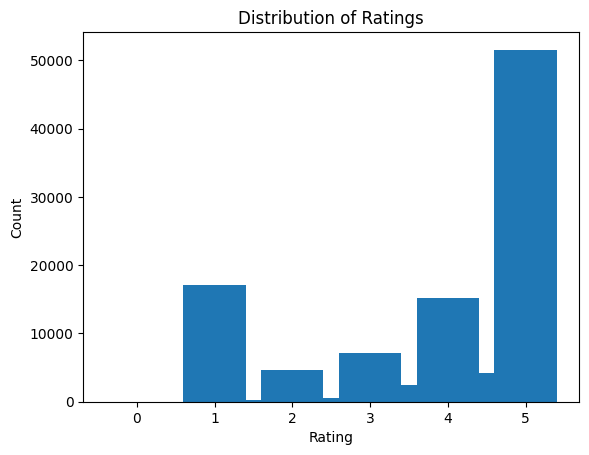

In [10]:
rating_counts = df['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

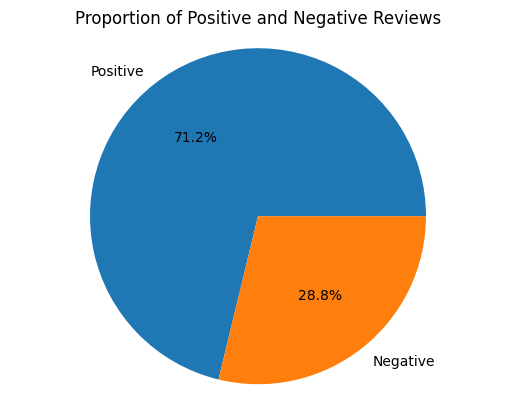

In [11]:
status_counts = df['Status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Positive and Negative Reviews')
plt.axis('equal')
plt.show()

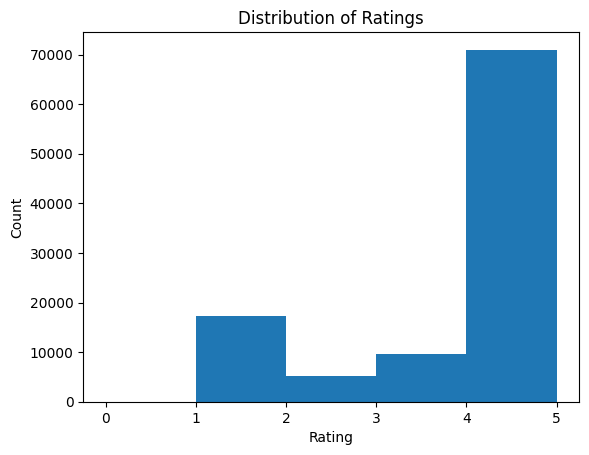

In [12]:
plt.hist(df['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

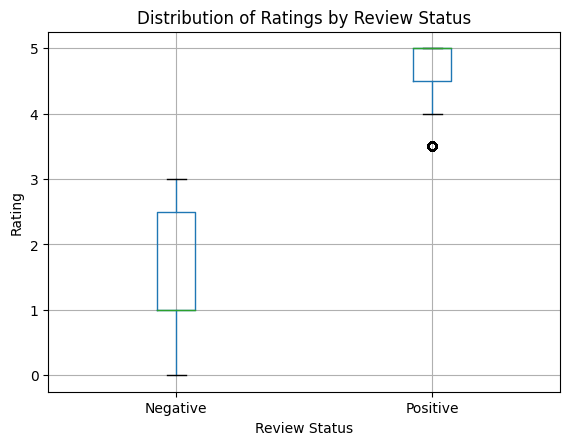

In [13]:
df.boxplot(column='rating', by='Status')
plt.xlabel('Review Status')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Review Status')
plt.suptitle('')
plt.show()

#### Convert the reviews into different words , using word_tokenizer

In [14]:
# To reduce computation time
review = df['review'][:100]

In [15]:
review

0     One stop place for every foodie as you get var...
1     Punjab Sweets Corner is a place where you'll f...
2     customer misbehave with me and the sandwich wa...
3     i had worst pizza from this food corner. Quali...
4     I recently visited this place in karol Bagh an...
                            ...                        
95    The place is really nice and beautiful. Went w...
96    The outlet is really underrated and I had my e...
97    Wonderful experience at this restaurant.Celebr...
98    Recommended by my friend, the place is an abso...
99    according to price , quantity was very low. go...
Name: review, Length: 100, dtype: object

In [16]:
tokens = []

for i in review:
    each_word = word_tokenize(i,language='english',preserve_line=True)
    tokens.extend(each_word)
    
print(tokens[:50])

['One', 'stop', 'place', 'for', 'every', 'foodie', 'as', 'you', 'get', 'variety', 'of', 'cuisine', 'under', 'one', 'roof.', 'Starting', 'with', 'chaat', '-', 'palak', 'patta', ',', 'raj', 'kachori', 'to', 'chole', 'bhature', 'Chinese', 'platter', ',', 'South', 'Indian', 'platter', 'and', 'Indian', 'delux', 'thali', 'everything', 'tasted', 'delicious.', 'Pav', 'bhaji', 'is', 'a', 'must', 'have', 'and', 'so', 'are', 'the']


#### Now i'm going to convert this into lowercase

In [17]:
Lower = [i.lower() for i in tokens]
print(Lower[:50])

['one', 'stop', 'place', 'for', 'every', 'foodie', 'as', 'you', 'get', 'variety', 'of', 'cuisine', 'under', 'one', 'roof.', 'starting', 'with', 'chaat', '-', 'palak', 'patta', ',', 'raj', 'kachori', 'to', 'chole', 'bhature', 'chinese', 'platter', ',', 'south', 'indian', 'platter', 'and', 'indian', 'delux', 'thali', 'everything', 'tasted', 'delicious.', 'pav', 'bhaji', 'is', 'a', 'must', 'have', 'and', 'so', 'are', 'the']


#### Removing Punctuations

In [18]:
punc = string.punctuation
Punc_removed = [i for i in Lower if i not in punc]
print(Punc_removed[:50])

['one', 'stop', 'place', 'for', 'every', 'foodie', 'as', 'you', 'get', 'variety', 'of', 'cuisine', 'under', 'one', 'roof.', 'starting', 'with', 'chaat', 'palak', 'patta', 'raj', 'kachori', 'to', 'chole', 'bhature', 'chinese', 'platter', 'south', 'indian', 'platter', 'and', 'indian', 'delux', 'thali', 'everything', 'tasted', 'delicious.', 'pav', 'bhaji', 'is', 'a', 'must', 'have', 'and', 'so', 'are', 'the', 'sweets.', 'the', 'owner']


#### Removing Stop words

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
remove = ['don', "don't", 'should', "aren'", "aren't", "couldn'", "couldn't", "didn'", "didn't", "doesn'", "doesn't", "hadn'", "hadn't", "hasn'", "hasn't", "haven'", "haven't", "isn'", "isn't", "mightn'", "mightn't", "mustn'", "mustn't", "needn'", "needn't", "shan'", "shan't", "shouldn'", "shouldn't", "wasn'", "wasn't", "weren'", "weren't", "won'", "won't", "wouldn'", "wouldn't"]

In [23]:
stop_words = set(stop_words) - set(remove)

In [24]:
filtered = [i for i in Punc_removed if i not in stop_words]
print(filtered[:50])

['one', 'stop', 'place', 'every', 'foodie', 'get', 'variety', 'cuisine', 'one', 'roof.', 'starting', 'chaat', 'palak', 'patta', 'raj', 'kachori', 'chole', 'bhature', 'chinese', 'platter', 'south', 'indian', 'platter', 'indian', 'delux', 'thali', 'everything', 'tasted', 'delicious.', 'pav', 'bhaji', 'must', 'sweets.', 'owner', 'humble', 'staff', 'polite', 'quick', 'service.', 'neat', 'clean', 'well', 'sanitized', 'pocket', 'friendly', 'place', 'highly', 'recommended', 'punjab', 'sweets']


#### Stemming And Lemmatization

In [25]:
p_stemm = PorterStemmer()
s_stemm = SnowballStemmer(language='english')
lan = LancasterStemmer()

p_st = list(map(lambda x: p_stemm.stem(x), filtered))
s_st = list(map(lambda x: s_stemm.stem(x), filtered))
lemm = list(map(lambda x: lan.stem(x), filtered))

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
pos = nltk.pos_tag(filtered)
print(pos[:20])

[('one', 'CD'), ('stop', 'JJ'), ('place', 'NN'), ('every', 'DT'), ('foodie', 'NN'), ('get', 'VB'), ('variety', 'NN'), ('cuisine', 'NN'), ('one', 'CD'), ('roof.', 'NN'), ('starting', 'VBG'), ('chaat', 'JJ'), ('palak', 'NN'), ('patta', 'NN'), ('raj', 'NN'), ('kachori', 'FW'), ('chole', 'JJ'), ('bhature', 'NN'), ('chinese', 'JJ'), ('platter', 'NN')]


### Create Vocabulary and Bag_of_Words

In [28]:
vocab = set(filtered)

In [29]:
bow = {word:index for index, word in enumerate(filtered)}
bow

{'one': 1690,
 'stop': 1582,
 'place': 1704,
 'every': 1093,
 'foodie': 4,
 'get': 900,
 'variety': 1139,
 'cuisine': 1192,
 'roof.': 9,
 'starting': 55,
 'chaat': 1182,
 'palak': 12,
 'patta': 13,
 'raj': 1570,
 'kachori': 1571,
 'chole': 1202,
 'bhature': 1203,
 'chinese': 314,
 'platter': 22,
 'south': 1224,
 'indian': 1453,
 'delux': 540,
 'thali': 1609,
 'everything': 458,
 'tasted': 447,
 'delicious.': 1602,
 'pav': 962,
 'bhaji': 879,
 'must': 1622,
 'sweets.': 32,
 'owner': 95,
 'humble': 34,
 'staff': 1527,
 'polite': 1240,
 'quick': 1076,
 'service.': 539,
 'neat': 1616,
 'clean': 1617,
 'well': 1110,
 'sanitized': 42,
 'pocket': 43,
 'friendly': 1100,
 'highly': 1624,
 'recommended': 1702,
 'punjab': 1562,
 'sweets': 532,
 'corner': 1564,
 "'ll": 1408,
 'find': 53,
 'starters': 56,
 'main': 1046,
 'course': 58,
 'desserts.': 59,
 'perfect': 1707,
 'family': 1350,
 'dinners.': 63,
 'love': 1305,
 'paneer': 1258,
 'momos': 487,
 'gulab': 600,
 'jamun': 601,
 'visit': 1675,
 'c

#### Splitting the data


In [30]:
X = df['review']
y = df['Status'].replace({"Positive":1, "Negative":0})

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [32]:
X_train

72061    Yumzaaa!!! Definitely something new and tasty....
64050    We recently ordered a few starters at my frien...
51203    Food quality ok.Ambiance ok.Service very bad t...
41311    Aglio oglio is a must try !! Courteous staff !...
70999    Thai paneer salad was good . if one or two veg...
                               ...                        
9372     I have had the chole bhature special paneer wa...
93553    Taste of food is very delicious. We ordered ma...
50496    Visited this place few days back when chinese ...
94735    Great food and ambience, liked paneer butter m...
83209    Ordered a pack of six donuts where 1 of the 6 ...
Name: review, Length: 92864, dtype: object

In [33]:
y_train

72061    1
64050    1
51203    0
41311    1
70999    1
        ..
9372     1
93553    1
50496    1
94735    1
83209    0
Name: Status, Length: 92864, dtype: int64

#### Preprocessing techniques

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [35]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3)) # Only counts

tfv = TfidfVectorizer(min_df=3, max_features=None, smooth_idf=True, use_idf=True, ngram_range=(1,3),
                     stop_words='english')

In [36]:
cv.fit(list(X_train)+list(X_test))
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [37]:
tfv.fit(list(X_train)+list(X_test))
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

#### Let us see the TF,IDF and TF-IDF scores

In [38]:
# To reduce the computation
docs = cv.fit_transform(df['review'][:500])

In [39]:
word_list = cv.get_feature_names_out() 
count_list = docs.toarray().sum(axis=0)
tf = dict(zip(word_list, count_list))
print(tf)

{'10': 7, '10 30': 1, '10 30 morning': 1, '10 apple': 1, '10 apple pie': 1, '10 care': 1, '10 care packaging': 1, '10 coffee': 1, '10 coffee chocolate': 1, '10 mins': 1, '10 mins seated': 1, '100': 6, '100 10': 1, '100 gm': 2, '100 gm dal': 1, '100 gm ready': 1, '100 metres': 1, '100 metres metro': 1, '100 satisfaction': 1, '100 satisfaction extremely': 1, '100 times': 1, '100 times raaj': 1, '105': 1, '105 bit': 1, '105 bit taste': 1, '10minutes': 1, '10minutes wished': 1, '10minutes wished left': 1, '110': 2, '110 rating': 1, '110 rating place': 1, '110 save': 1, '110 save tax': 1, '116': 1, '116 including': 1, '116 including tax': 1, '12': 1, '12 clock': 1, '12 clock decided': 1, '120': 2, '120 chole': 1, '120 chole 100': 1, '120 rupees': 1, '130': 1, '130 try': 1, '130 try food': 1, '15': 4, '15 min': 1, '15 min got': 1, '15 minutes': 2, '15 minutes seat': 1, '15 years': 1, '15 years delhi': 1, '170': 1, '170 rupees': 1, '170 rupees dal': 1, '190': 1, '190 gave': 1, '190 gave 110':

1)We create an instance of the CountVectorizer class and assign it to the variable cv. The CountVectorizer will be used to convert the text into a matrix of token counts.

20We call the fit_transform() method of the CountVectorizer object cv on the corpus. This method fits the vectorizer to the corpus and transforms the documents into a matrix of token counts. The result is stored in the docs variable, which is a sparse matrix.

3)We call the get_feature_names() method on the CountVectorizer object cv. This method returns a list of feature names, which are essentially the unique tokens found in the corpus. These feature names represent the columns of the matrix.

4)We convert the docs sparse matrix to a dense array using the toarray() method. Then, we calculate the sum of counts for each feature by taking the sum along axis=0. This gives us the count of each feature in the entire corpus. The result is stored in the count_list variable, which is a NumPy array.

5)We create a dictionary tf using the zip() function, combining the word_list (feature names) and count_list (counts). This dictionary maps each feature name to its corresponding count.

6)Finally, we print the tf dictionary, which shows the feature names and their counts in the corpus.

In [40]:
dict((k, tf[k]) for k in ['kachori', 'palak'] if k in tf)

{'kachori': 63, 'palak': 20}

In [41]:
# Inverse document frequency

In [42]:
idf_values = tfv._tfidf.idf_
idf = dict(zip(tfv.get_feature_names_out(), idf_values))

In [43]:
dict((k, idf[k]) for k in ['kachori', 'palak'] if k in idf)

{'kachori': 6.870945814078666, 'palak': 6.366324967199558}

### TF-IDF score

In [44]:
docs = tfv.fit_transform(df['review'])

In [45]:
first_vector = docs[0]

In [46]:
TF_frame = pd.DataFrame(first_vector.T.todense(), index=tfv.get_feature_names_out(), columns=["tfidf"])


In [47]:
print(TF_frame.loc['kachori'])
print(TF_frame.loc['palak'])

tfidf    0.102028
Name: kachori, dtype: float64
tfidf    0.094535
Name: palak, dtype: float64


#### Model Building 

###### 1.Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver="saga", C=1.0, max_iter=1000)

##### 2.Naive Bayes 

In [50]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [51]:
#On count vectorizer
nb.fit(X_train_tfv, y_train)
y_pred = nb.predict(X_test_tfv)

print(accuracy_score(y_test, y_pred))

0.9050295571276287


In [52]:
#On tfv
nb.fit(X_train_cv, y_train)
y_pred = nb.predict(X_test_cv)

print(accuracy_score(y_test, y_pred))

0.9076460897373777


#### Function for Prediction

In [53]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
y_pred[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [71]:
y_test[:10]

95077     1
90028     0
63108     1
80976     1
100753    1
11587     1
41144     0
65679     1
93477     1
61713     0
Name: Status, dtype: int64

In [72]:
import joblib

# Save the trained model
joblib.dump(nb,'Zpmato_model')


['Zpmato_model']

In [80]:
model = joblib.load('Zpmato_model')

In [77]:
import joblib
joblib.dump(cv,'my_count_vectorizer')

['my_count_vectorizer']